# Project: Investigate a Dataset (No show appointments dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is to investigate a dataset. The dataset i chose is (No_show appointments dataset). The dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

A number of characteristics about the patient are included in each row.

●'ScheduledDay' tells us on what day the patient set up their appointment.

●'Neighborhood' indicates the location of the hospital. 

●'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

The questions that i want to answer what is the percentage for showed up patients against not showed up patients?

and what is the correlation between the features(Age, SMS_received, Gender, Scholarship) and(show up, no show up patients )

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# load dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Descriptive summary

In [3]:
df .describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
# showing the first 5 rows of the dataframe
df .head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# showing the last 6 rows of the dataframe
df .tail(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
#checking the info of the data ex: datatypes, null values ..etc
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#checking if there is null values
df .isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [8]:
#checking if there is a duplicated values
print('sum of duplicated values:', +sum(df.duplicated()))

sum of duplicated values: 0


### Data Cleaning 
#### fixing typos in columns' names.

In [9]:
df.rename(columns={'Hipertension': 'Hypertension',
                   'Handcap': 'Handicap','No-show': 'No_show' }, inplace = True)
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')


#### convert No_show column data:
From (No to 0) for showed up appointments and from (yes to 1) for people who didn't show up.

In [10]:
df['No_show'].replace({'Yes':1,'No':0}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


#### covert the columns that has date to datetime datatype:

In [11]:
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(2)
memory usage: 11.8+ MB


#### removing the ages that has 0 or less 


In [19]:
df = df[(df.Age >= 0) & (df.Age <= 90)]
df.shape

(110218, 14)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (what is the percentage for showed up patients against not showed up patients? )

#### Using a pie chart to demonstrate the percentage of showed up and not show up patients.

False    87961
True     22257
Name: No_show, dtype: int64
20.193616287720697 %


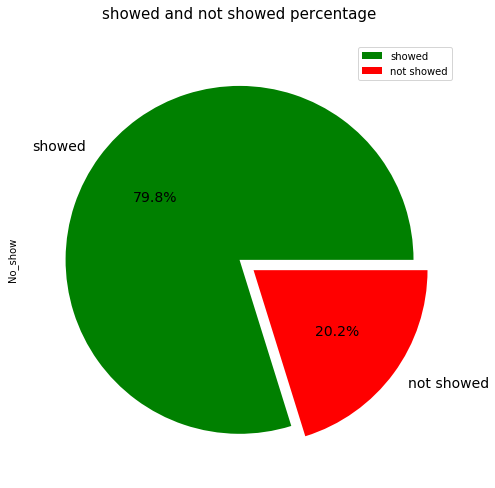

In [20]:
# calculating the percentage of show up and no show up patients.

Not_showed = (df['No_show'] == 1).value_counts()
print( (df['No_show'] == 1).value_counts())

print((Not_showed[1] / Not_showed.sum()) * 100, '%')
labels = 'showed','not showed'
explode=(0,0.1)
pieGraph = Not_showed.plot.pie(figsize=(8,8),labels= labels,explode=explode, autopct='%1.1f%%', fontsize = 14, colors ='grean, red');
pieGraph.set_title('showed and not showed percentage\n', fontsize = 15);
plt.legend();

### Research Question 2  (what is the correlation between the features(Age, SMS_received, Gender, Scholarship) and (show up, no show up patients ))

#### Using a histogram to show the correlation between Age and showed up patients.

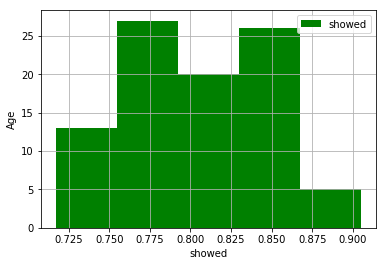

In [41]:
#create a variable for patients who showed up and not show up.

showed_up = df['No_show'] == 0
not_show_up = df['No_show'] == 1
df['showed_up'] = showed_up
df['not_show_up'] = not_show_up

# using groupby function to show relation between Age feature and showed up percentage. 
# visualize the average of patients who showed up.

df.groupby ('Age')['showed_up'].mean().hist(bins=5,label='showed',color='green');
plt.xlabel('showed')
plt.ylabel('Age')
plt.legend()

#### Calculating the average of patients who showed up.

In [31]:
#by using mean function.
df.Age[showed_up].mean()

37.635008697036184

####  Using a histogram to show the correlation between Age and not show up patients.

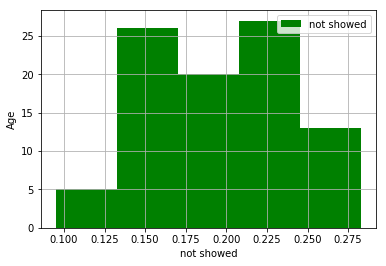

In [40]:
# using groupby function to show relation between Age feature and not show up percentage. 
# visualize the average of patients who did not show up.
df.groupby ('Age')['not_show_up'].mean().hist(bins=5, label='not showed',color='green');
plt.xlabel('not showed')
plt.ylabel('Age')
plt.legend()

#### Calculating the average of patients who did not show up.

In [34]:
#by using mean function.
df.Age[not_show_up].mean()

34.151772476074946

#### Using a bar chart to demonstrate relation between SMS received and showed up patients. 

SMS_received
0    0.833068
1    0.724110
Name: showed_up, dtype: float64


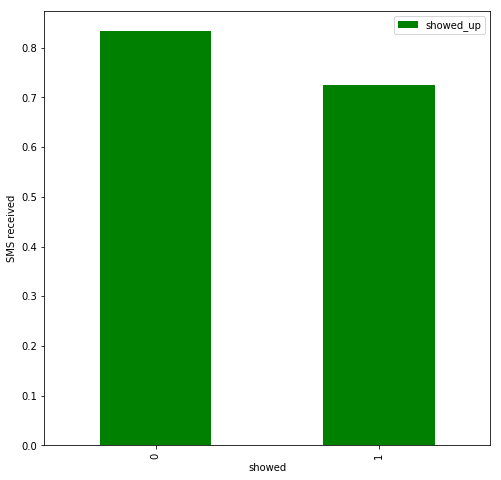

In [42]:
# using groupby function to show relation between SMS received feature and showed up percentage. 
# visualize the average of patients who received SMS and not.
print(df.groupby ('SMS_received')['showed_up'].mean())
df.groupby ('SMS_received')['showed_up'].mean().plot(kind='bar', figsize=(8,8),color='green')
plt.xlabel('showed')
plt.ylabel('SMS received')
plt.legend()

#### Using a bar chart to demonstrate relation between scholarship and showed up patients. 

Scholarship
0    0.801936
1    0.762637
Name: showed_up, dtype: float64


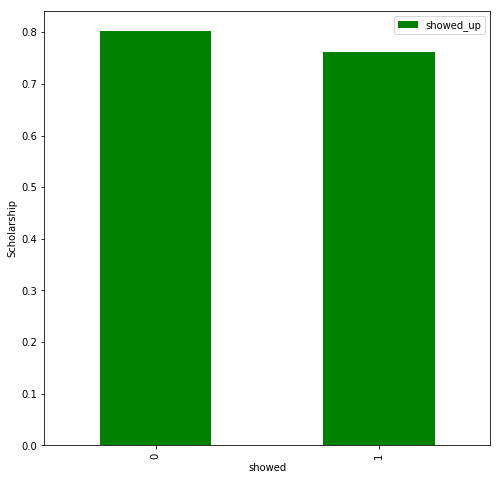

In [43]:
# using groupby function to show relation between Scholarship feature and showed up percentage. 
# visualize the average of patients who have Scholarship or not.
print(df.groupby ('Scholarship')['showed_up'].mean())
df.groupby ('Scholarship')['showed_up'].mean().plot(kind='bar', figsize=(8,8),color='green')
plt.xlabel('showed')
plt.ylabel('Scholarship')
plt.legend()

#### Using a bar chart to demonstrate relation between Gender and showed up patients. 

Gender
F    0.203089
M    0.199798
Name: No_show, dtype: float64


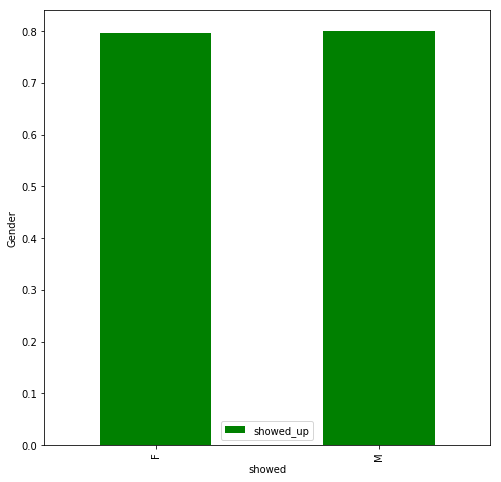

In [44]:
# using groupby function to show relation between Gender feature and showed up percentage. 
# visualize the average of patients who is male or female.
print(df.groupby ('Gender')['No_show'].mean())
df.groupby ('Gender')['showed_up'].mean().plot(kind='bar', figsize=(8,8),color='green')
plt.xlabel('showed')
plt.ylabel('Gender')
plt.legend()

<a id='conclusions'></a>
## Conclusions

79% of the patients are commited to their appointment.

The age is the most important indicator to identify if the patient will attend to the appointment.The analysis findings show that the average age of patients that are commited with the appointment is 37 , and the average age of patients who are not showing up is 34.

We can not depend on the SMS analysis data to identify if the patient will attend to the appointment or not.

As per our data patients with scholarship are most likely to not showing up.

The gender factor is not a good indicator to decide if the paient will attend or no. 


## Limitations
Some of the collected data are not logic. The age value can not be 0 or less or more than 100 years.

The patients collected data are missing some important information that can help in analyzing reasons of no show for patients such as insurance, employee or not, social status(married or single).
